In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.preprocessing import MinMaxScaler
combined = pd.read_csv("/Users/admin/Downloads/combined_psf.csv")

In [2]:
combined = combined.drop(combined.columns[0], axis=1)

In [3]:
combined.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,month,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.154684,2020-02,5643.51277,974.570312
1,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-09,3315.28120,1508.167693
2,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-06,3379.86460,1405.381742
3,5,NEO PEE TECK LANE,Strata Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.139334,2021-03,2002.08540,939.020883
4,5,NEO PEE TECK LANE,Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.154684,2020-03,1714.68927,1533.805597


In [4]:
combined['floor_range'] = combined['floor_range'].str.replace('~', '')
combined.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,month,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.154684,2020-02,5643.51277,974.570312
1,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-09,3315.28120,1508.167693
2,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-06,3379.86460,1405.381742
3,5,NEO PEE TECK LANE,Strata Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.139334,2021-03,2002.08540,939.020883
4,5,NEO PEE TECK LANE,Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.154684,2020-03,1714.68927,1533.805597


In [5]:
combined = combined.drop('month', axis=1)

In [6]:
df = combined.copy()

# Label encoding
df['street'] = df['street'].str.upper()
df['street'] = df['street'].astype('category')
street_dict = dict(zip(df['street'].cat.codes, df['street']))
df['street'] = df['street'].cat.codes

df['propertyType'] = df['propertyType'].astype('category')
property_dict = dict(zip(df['propertyType'].cat.codes, df['propertyType']))
df['propertyType'] = df['propertyType'].cat.codes

df['floor_range'] = df['floor_range'].astype('category')
floor_dict = dict(zip(df['floor_range'].cat.codes, df['floor_range']))
df['floor_range'] = df['floor_range'].cat.codes

## Descriptive Analysis

In [7]:
combined.describe()

,district,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,sentiment,floor_area_sqft,price_psf
count,135089.000000,135089.000000,135089.000000,135089.000000,135089.000000,135089.000000,135089.000000,135089.000000,135089.000000,135089.000000,135089.000000,135089.000000
mean,18.151004,246.529668,32.641858,6.947627,10.181029,0.116338,123.629132,1.358514,103.845347,0.118725,1237.988403,706.641203
std,5.377940,5451.046039,11.183167,4.143911,5.641126,0.352186,58.682927,0.043496,0.068291,0.034399,971.966381,511.020186
min,1.000000,2.580000,1.000000,1.000000,1.000000,0.000000,-1.000000,1.239641,103.687191,-0.039881,258.333600,32.974069
25%,16.000000,67.250000,25.000000,4.000000,5.000000,0.000000,64.000000,1.325289,103.794906,0.096782,904.167600,371.612520
50%,20.000000,80.420000,37.000000,5.000000,11.000000,0.000000,122.714286,1.355269,103.847889,0.126775,1097.917800,456.773722
75%,20.000000,93.500000,37.000000,11.000000,14.000000,0.000000,167.714286,1.389063,103.898665,0.135898,1302.431900,936.233092
max,28.000000,999973.000000,53.000000,16.000000,39.000000,2.000000,226.000000,1.460839,103.987293,0.317045,52058.525960,6024.537364


In [8]:
combined.dtypes

district              int64
street               object
propertyType         object
remaining_lease     float64
school                int64
hawkercentre          int64
supermarkets          int64
Bus Stops Nearby      int64
crime_number        float64
latitude            float64
longitude           float64
floor_range          object
sentiment           float64
floor_area_sqft     float64
price_psf           float64
dtype: object

In [9]:
combined['district'] = combined['district'].astype(str)

## Correlation Analysis
> Including Correlation Values

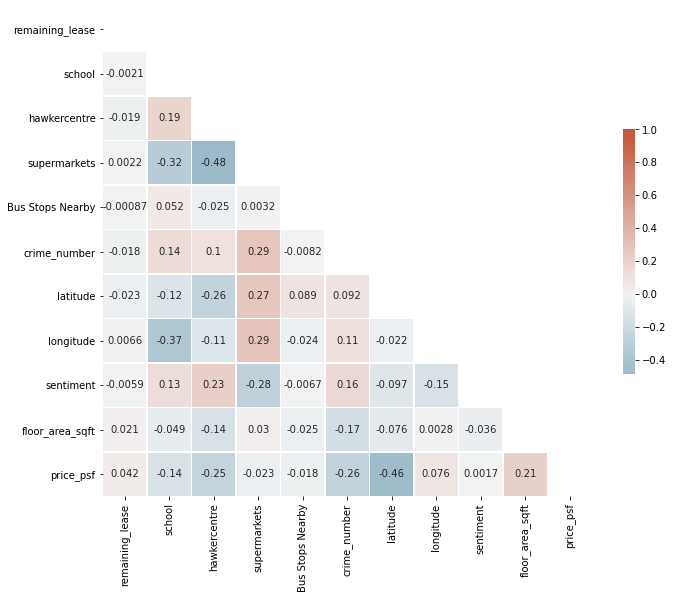

In [10]:
# correlation analysis
corr = combined.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

## Examining Number of Records in Each Category Pre Normalisation

> Bar Plots

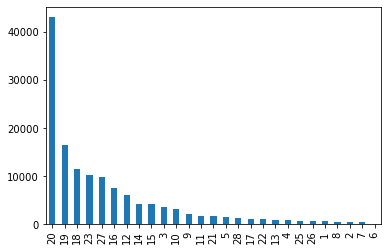

In [11]:
combined['district'].value_counts().plot(kind='bar')

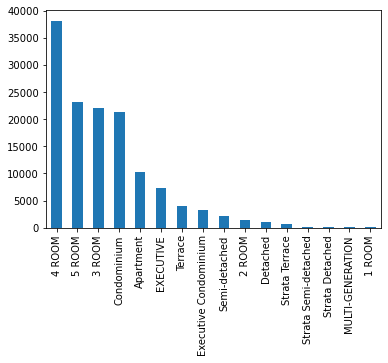

In [12]:
combined['propertyType'].value_counts().plot(kind='bar')

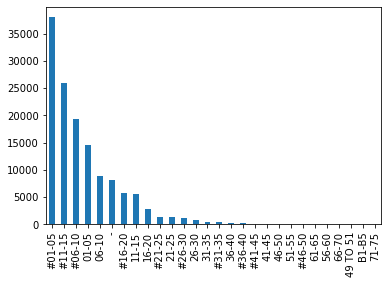

In [13]:
combined['floor_range'].value_counts().plot(kind='bar')

## Variation of Variables with Price

> Pairplot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


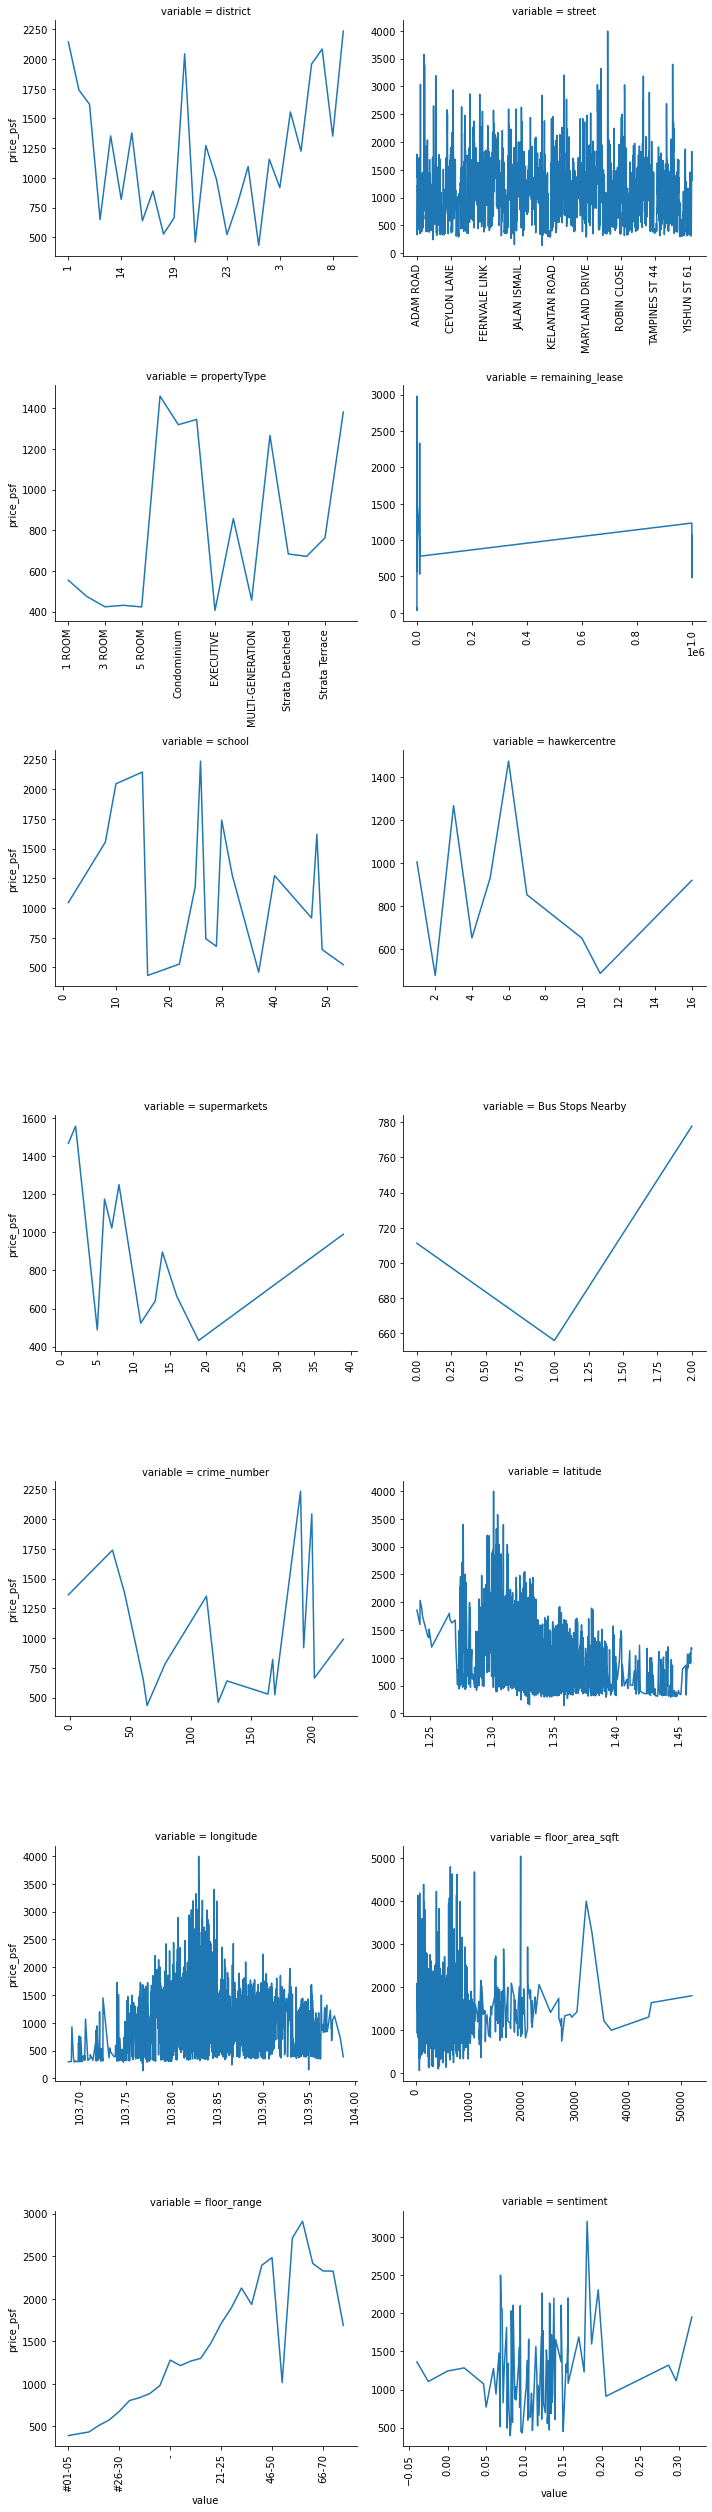

In [14]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
vals = ['district',            
'street',              
'propertyType',      
'remaining_lease',     
'school',             
'hawkercentre',        
'supermarkets',        
'Bus Stops Nearby',   
'crime_number',        
'latitude',           
'longitude',           
'floor_area_sqft',     
'floor_range',         
'sentiment']   
f = pd.melt(combined, id_vars=['price_psf'], value_vars=vals)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "price_psf")

> Scatterplot

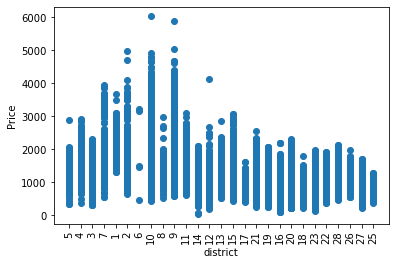

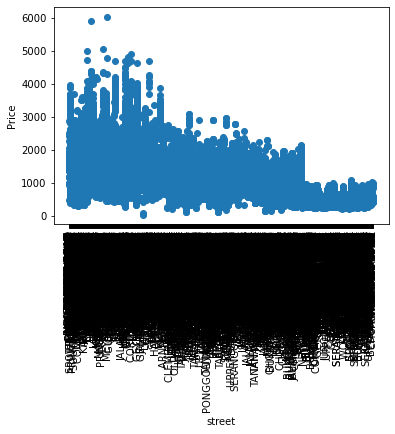

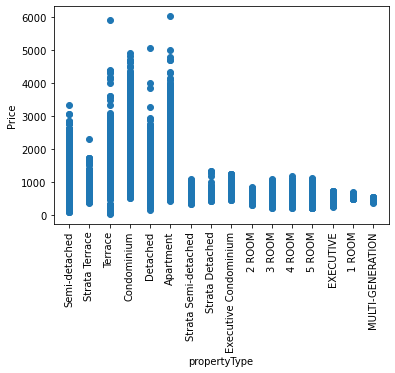

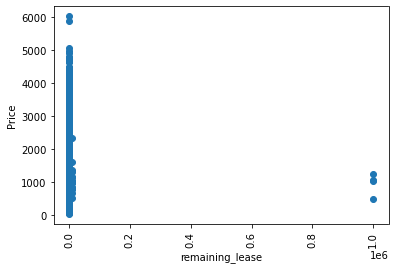

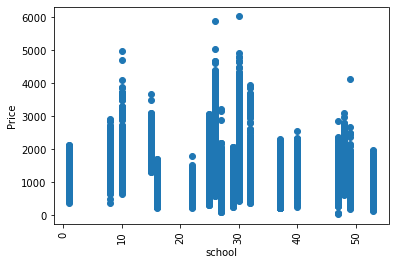

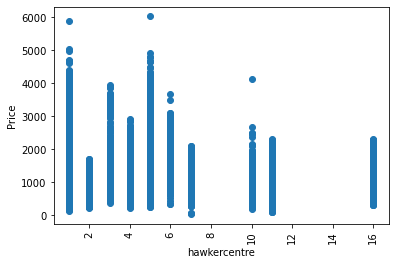

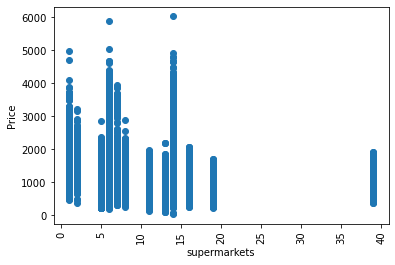

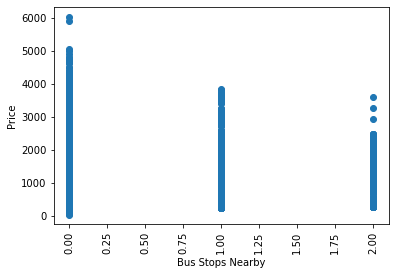

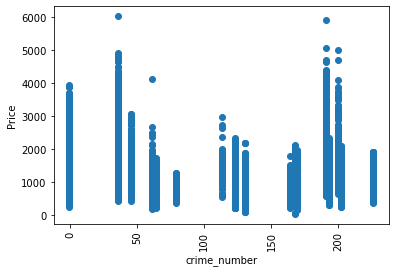

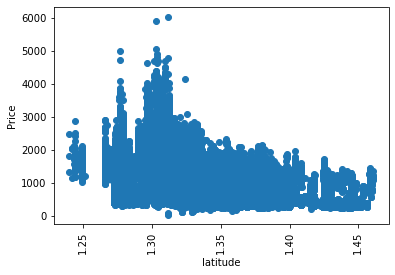

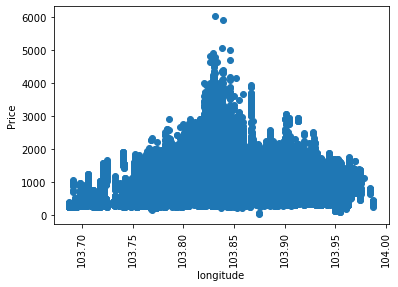

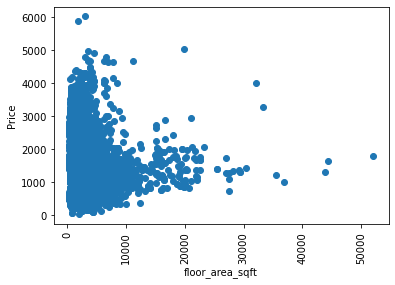

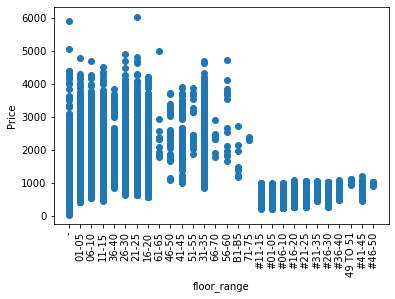

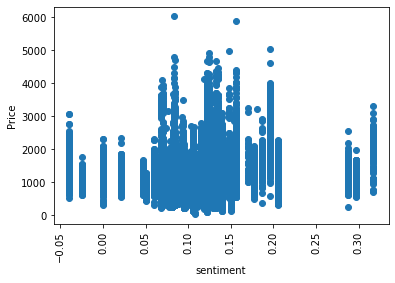

In [15]:
for i in range(len(vals)):
    plt.scatter(combined[vals[i]],combined["price_psf"])
    plt.ylabel("Price")
    plt.xlabel(vals[i]);
    plt.xticks(rotation=90)
    plt.show()

In [16]:
combined.columns

Index(['district', 'street', 'propertyType', 'remaining_lease', 'school',
       'hawkercentre', 'supermarkets', 'Bus Stops Nearby', 'crime_number',
       'latitude', 'longitude', 'floor_range', 'sentiment', 'floor_area_sqft',
       'price_psf'],
      dtype='object')

## Examining Categorical Variables against Price

> District

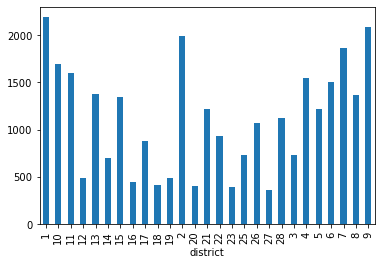

In [17]:
combined.groupby('district').price_psf.agg(pd.Series.median).plot.bar()

> Property Type

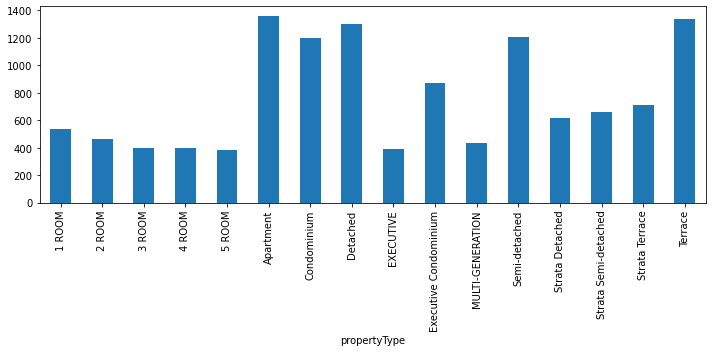

In [18]:
plt.figure(figsize=(10,5)) 
combined.groupby('propertyType').price_psf.agg(pd.Series.median).plot.bar()
plt.xticks(rotation=90)
plt.tight_layout()

> Schools Nearby

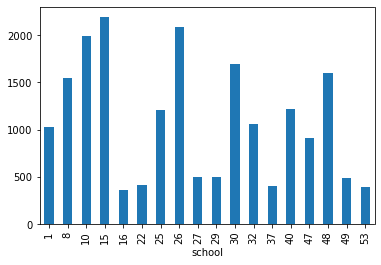

In [19]:
combined.groupby('school').price_psf.agg(pd.Series.median).plot.bar()

> Hawker Centres Nearby

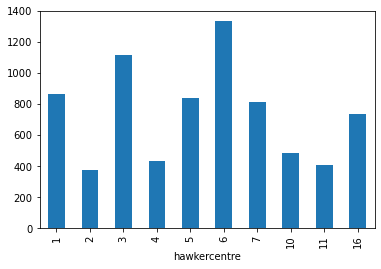

In [20]:
combined.groupby('hawkercentre').price_psf.agg(pd.Series.median).plot.bar()

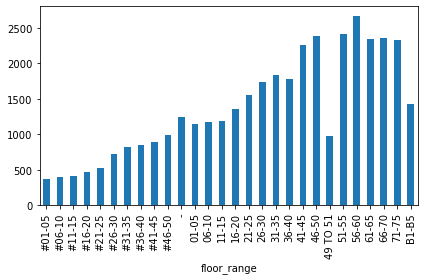

In [21]:
combined.groupby('floor_range').price_psf.agg(pd.Series.median).plot.bar()
plt.xticks(rotation=90)
plt.tight_layout()

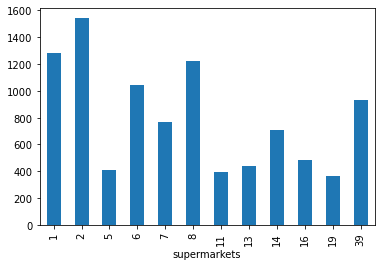

In [22]:
combined.groupby('supermarkets').price_psf.agg(pd.Series.median).plot.bar()

## Examine Number of Crimes within Districts

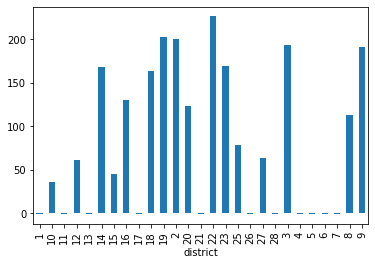

In [23]:
combined.groupby('district').crime_number.agg(pd.Series.median).plot.bar()

## Examining the Types of Properties amongst Districts

<Figure size 14400x7200 with 0 Axes>

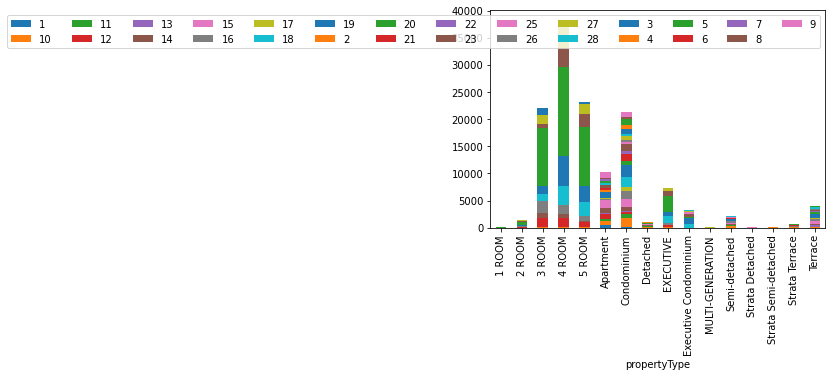

In [24]:
plt.figure(figsize=(200,100)) 

combined.groupby('district').propertyType.value_counts().unstack(0).plot(kind='bar', stacked= True)
plt.legend(loc="upper right", ncol=len(combined.columns)-1)

## Overall Sentiment Per District

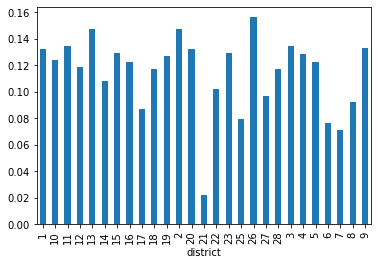

In [25]:
combined.groupby('district').sentiment.agg(pd.Series.median).plot.bar()
#sns.barplot(combined["district"],combined["sentiment"])

## Supermarkets in each district

> Number of Supermarkets in all districts the same? might need to check data cleaning

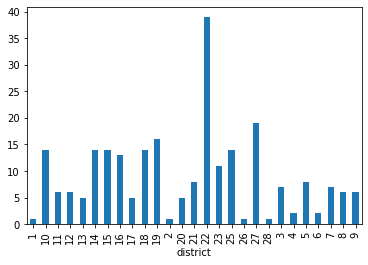

In [26]:
combined.groupby('district').supermarkets.agg(pd.Series.median).plot.bar()

## Hawkercentres Per District

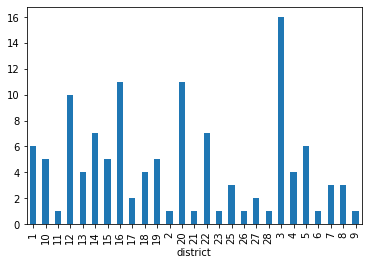

In [27]:
combined.groupby('district').hawkercentre.agg(pd.Series.median).plot.bar()

## Schools Per District

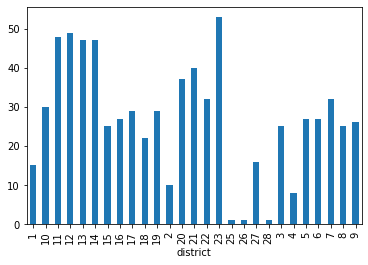

In [28]:
combined.groupby('district').school.agg(pd.Series.median).plot.bar()

## Floor Area Per District

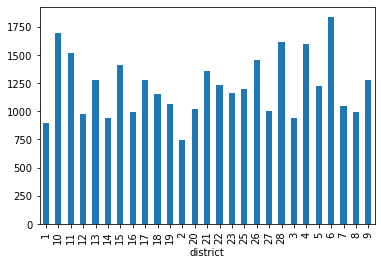

In [29]:
combined.groupby('district').floor_area_sqft.agg(pd.Series.median).plot.bar()

## Remaining Lease Per District

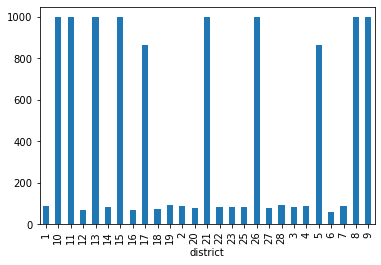

In [30]:
combined.groupby('district').remaining_lease.agg(pd.Series.median).plot.bar()

## VIF Scores

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
df.drop(['price_psf'], axis=1, inplace=True)
df.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,floor_area_sqft
0,5,2016,11,999.0,27,6,8,0,-1.0,1.282130,103.786879,10,0.154684,5643.51277
1,5,2016,11,999.0,27,6,8,0,-1.0,1.282130,103.786879,10,0.122456,3315.28120
2,5,2016,11,999.0,27,6,8,0,-1.0,1.282130,103.786879,10,0.122456,3379.86460
3,5,1331,14,999.0,27,6,8,2,-1.0,1.292047,103.768591,10,0.139334,2002.08540
4,5,1331,15,999.0,27,6,8,2,-1.0,1.292047,103.768591,10,0.154684,1714.68927


### Before Normalisation

In [33]:
output = calc_vif(df)
output

,variables,VIF
0,district,26.643001
1,street,4.036389
2,propertyType,6.556572
3,remaining_lease,1.004228
4,school,11.911646
5,hawkercentre,6.819780
6,supermarkets,8.113753
7,Bus Stops Nearby,1.134344
8,crime_number,7.772058
9,latitude,2060.786011


### After Normalisation

In [34]:
scaler = MinMaxScaler()
col = ['school']
x = df[col].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns = col, index = df.index)
df[col] = df_temp
df.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,floor_area_sqft
0,0.148148,2016,11,999.0,0.5,6,8,0,-1.0,1.282130,103.786879,10,0.154684,5643.51277
1,0.148148,2016,11,999.0,0.5,6,8,0,-1.0,1.282130,103.786879,10,0.122456,3315.28120
2,0.148148,2016,11,999.0,0.5,6,8,0,-1.0,1.282130,103.786879,10,0.122456,3379.86460
3,0.148148,1331,14,999.0,0.5,6,8,2,-1.0,1.292047,103.768591,10,0.139334,2002.08540
4,0.148148,1331,15,999.0,0.5,6,8,2,-1.0,1.292047,103.768591,10,0.154684,1714.68927


In [35]:
output = calc_vif(df)
output

,variables,VIF
0,district,24.020088
1,street,4.036395
2,propertyType,6.556579
3,remaining_lease,1.004228
4,school,11.268899
5,hawkercentre,6.819805
6,supermarkets,8.113731
7,Bus Stops Nearby,1.134344
8,crime_number,7.772064
9,latitude,2060.786323


In [36]:
df.drop(['latitude', 'longitude'], axis=1, inplace=True)
calc_vif(df)

,variables,VIF
0,district,10.803543
1,street,3.418680
2,propertyType,6.508305
3,remaining_lease,1.004106
4,school,8.976316
5,hawkercentre,4.680570
6,supermarkets,6.770763
7,Bus Stops Nearby,1.126177
8,crime_number,7.762595
9,floor_range,3.082927
